In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os.path

from os import getcwd
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import savemat, loadmat
import math
from scipy.fftpack import fft, ifft
from scipy.stats import zscore, f_oneway
#import samplerate
import multiprocessing as mp
from scipy.signal import resample 
import random
import pyreadr
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score

import scipy.cluster.hierarchy as hac 


In [2]:
def zscore_bseline(input_mat):
    use_unit_z = np.zeros(input_mat.shape)
    for item in range(input_mat.shape[0]):
        use_unit = input_mat[item]
        unit_baseline = use_unit[0:1500]
        unit_baseline_mean = np.mean(unit_baseline)
        unit_baseline_std = np.std(unit_baseline)
        use_unit_z[item] = (use_unit - unit_baseline_mean)/unit_baseline_std
    return use_unit_z

In [3]:
all_unit_ave_activity = loadmat("processed_data/all_unit_ave_activity.mat")
cue_mat_1 = all_unit_ave_activity['cue_mat_1']
cue_mat_all = all_unit_ave_activity['cue_mat_all']
cue_mat_1_sem = all_unit_ave_activity['cue_mat_1_sem']
cue_mat_all_sem = all_unit_ave_activity['cue_mat_all_sem']

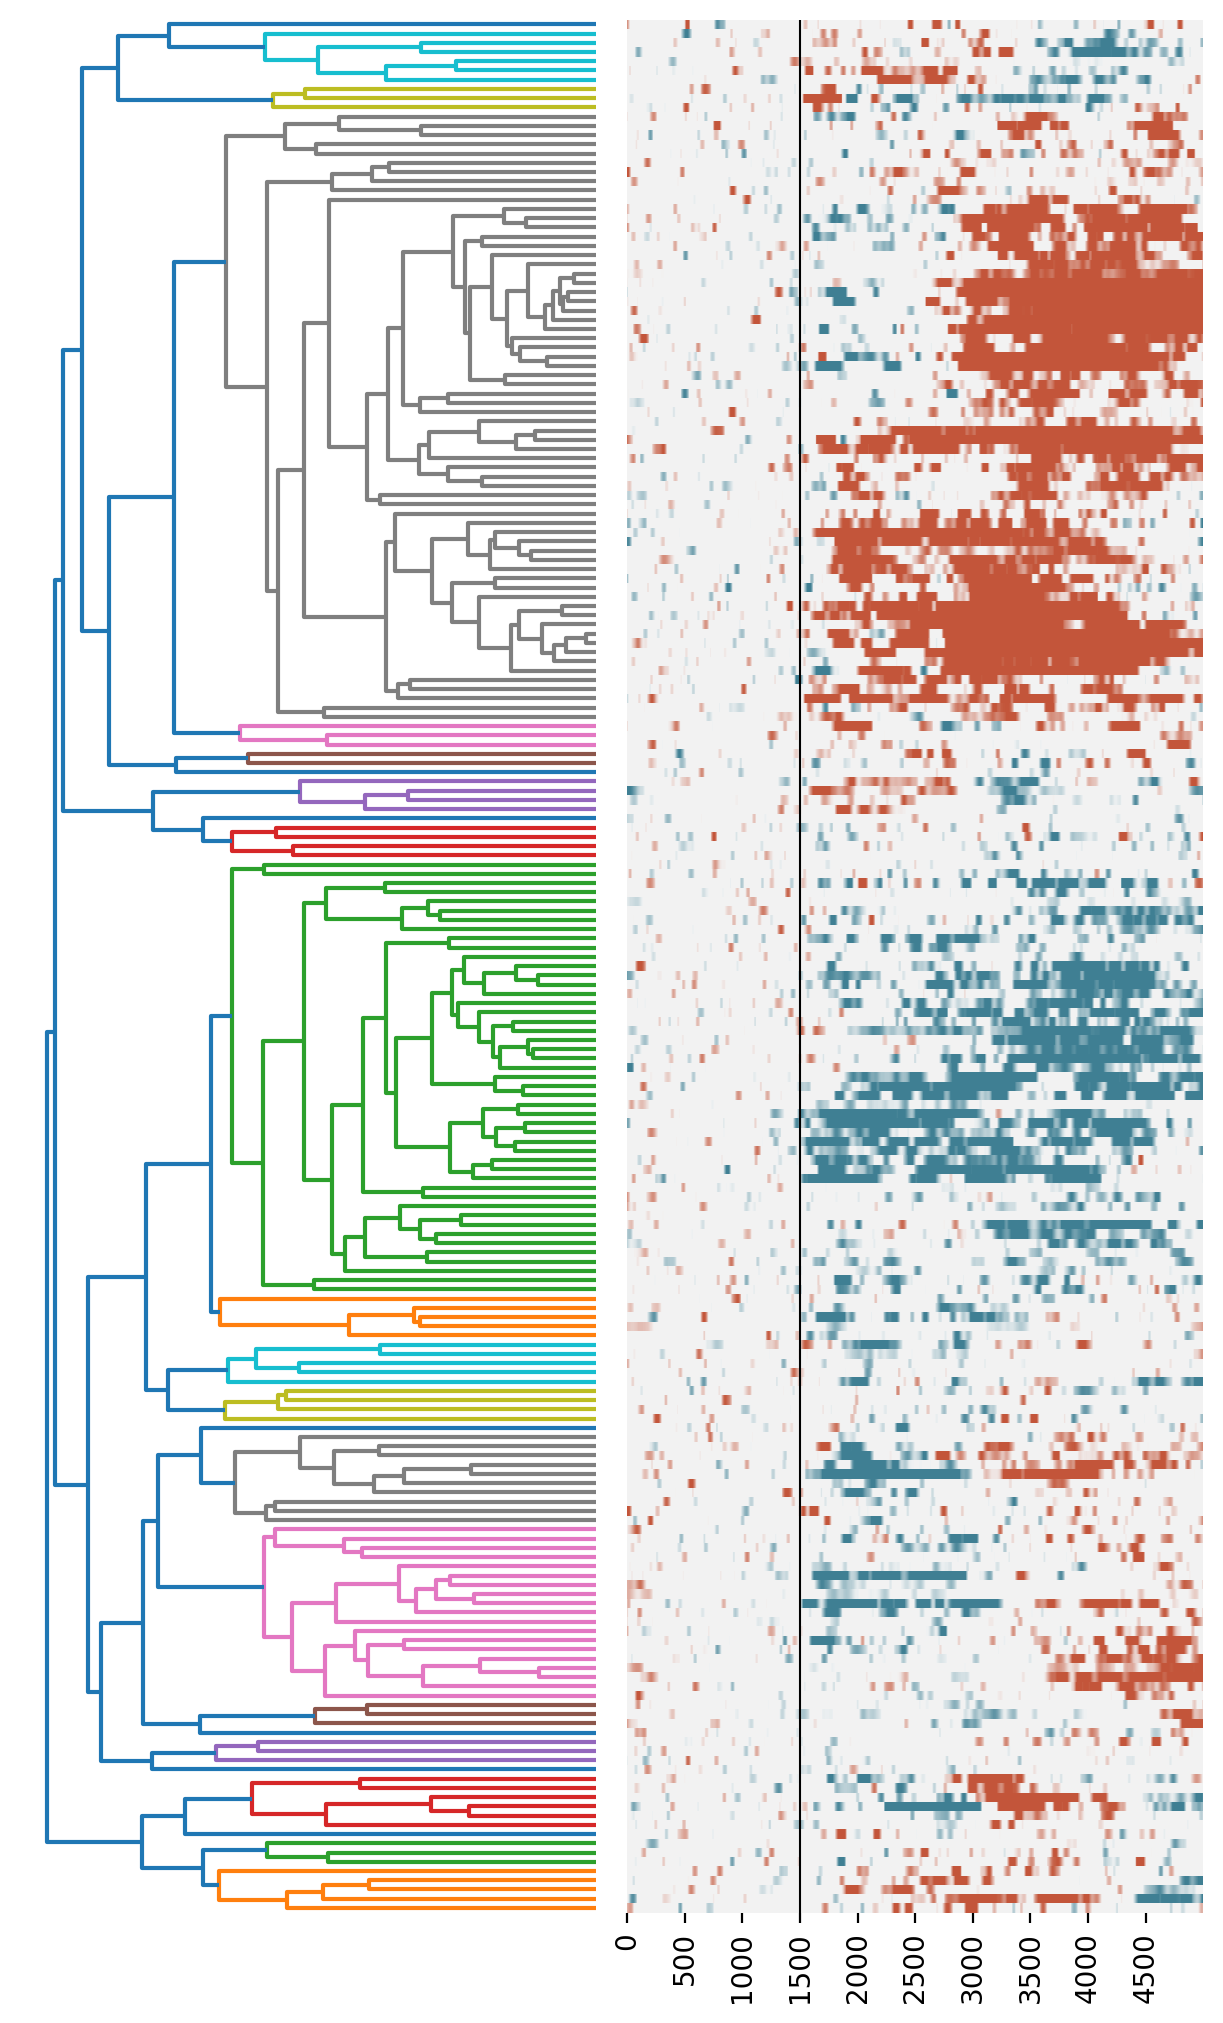

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(6, 10), dpi=200, constrained_layout=True)
use_cmap = sns.diverging_palette(220, 20, as_cmap=1, sep=125)

Z = hac.linkage(zscore_bseline(cue_mat_1)[:, 1500:], 
                metric='cosine', optimal_ordering=1, method='weighted')
dn = hac.dendrogram(Z, get_leaves=1, ax=axs[0], orientation='left', no_labels=1)

cos_ordered_units = np.zeros(cue_mat_1.shape)
for item in range(cue_mat_1.shape[0]):
    cos_ordered_units[item] = cue_mat_1[dn['leaves'][item]]
    
sns.heatmap(zscore_bseline(cos_ordered_units), cmap=use_cmap, cbar=False,   
            vmax=3, vmin=-3, ax=axs[1], yticklabels=False, xticklabels=500)
axs[1].invert_yaxis()
axs[0].axis('off')
axs[1].axvline(1500, color='k', linewidth=0.75)
plt.show();

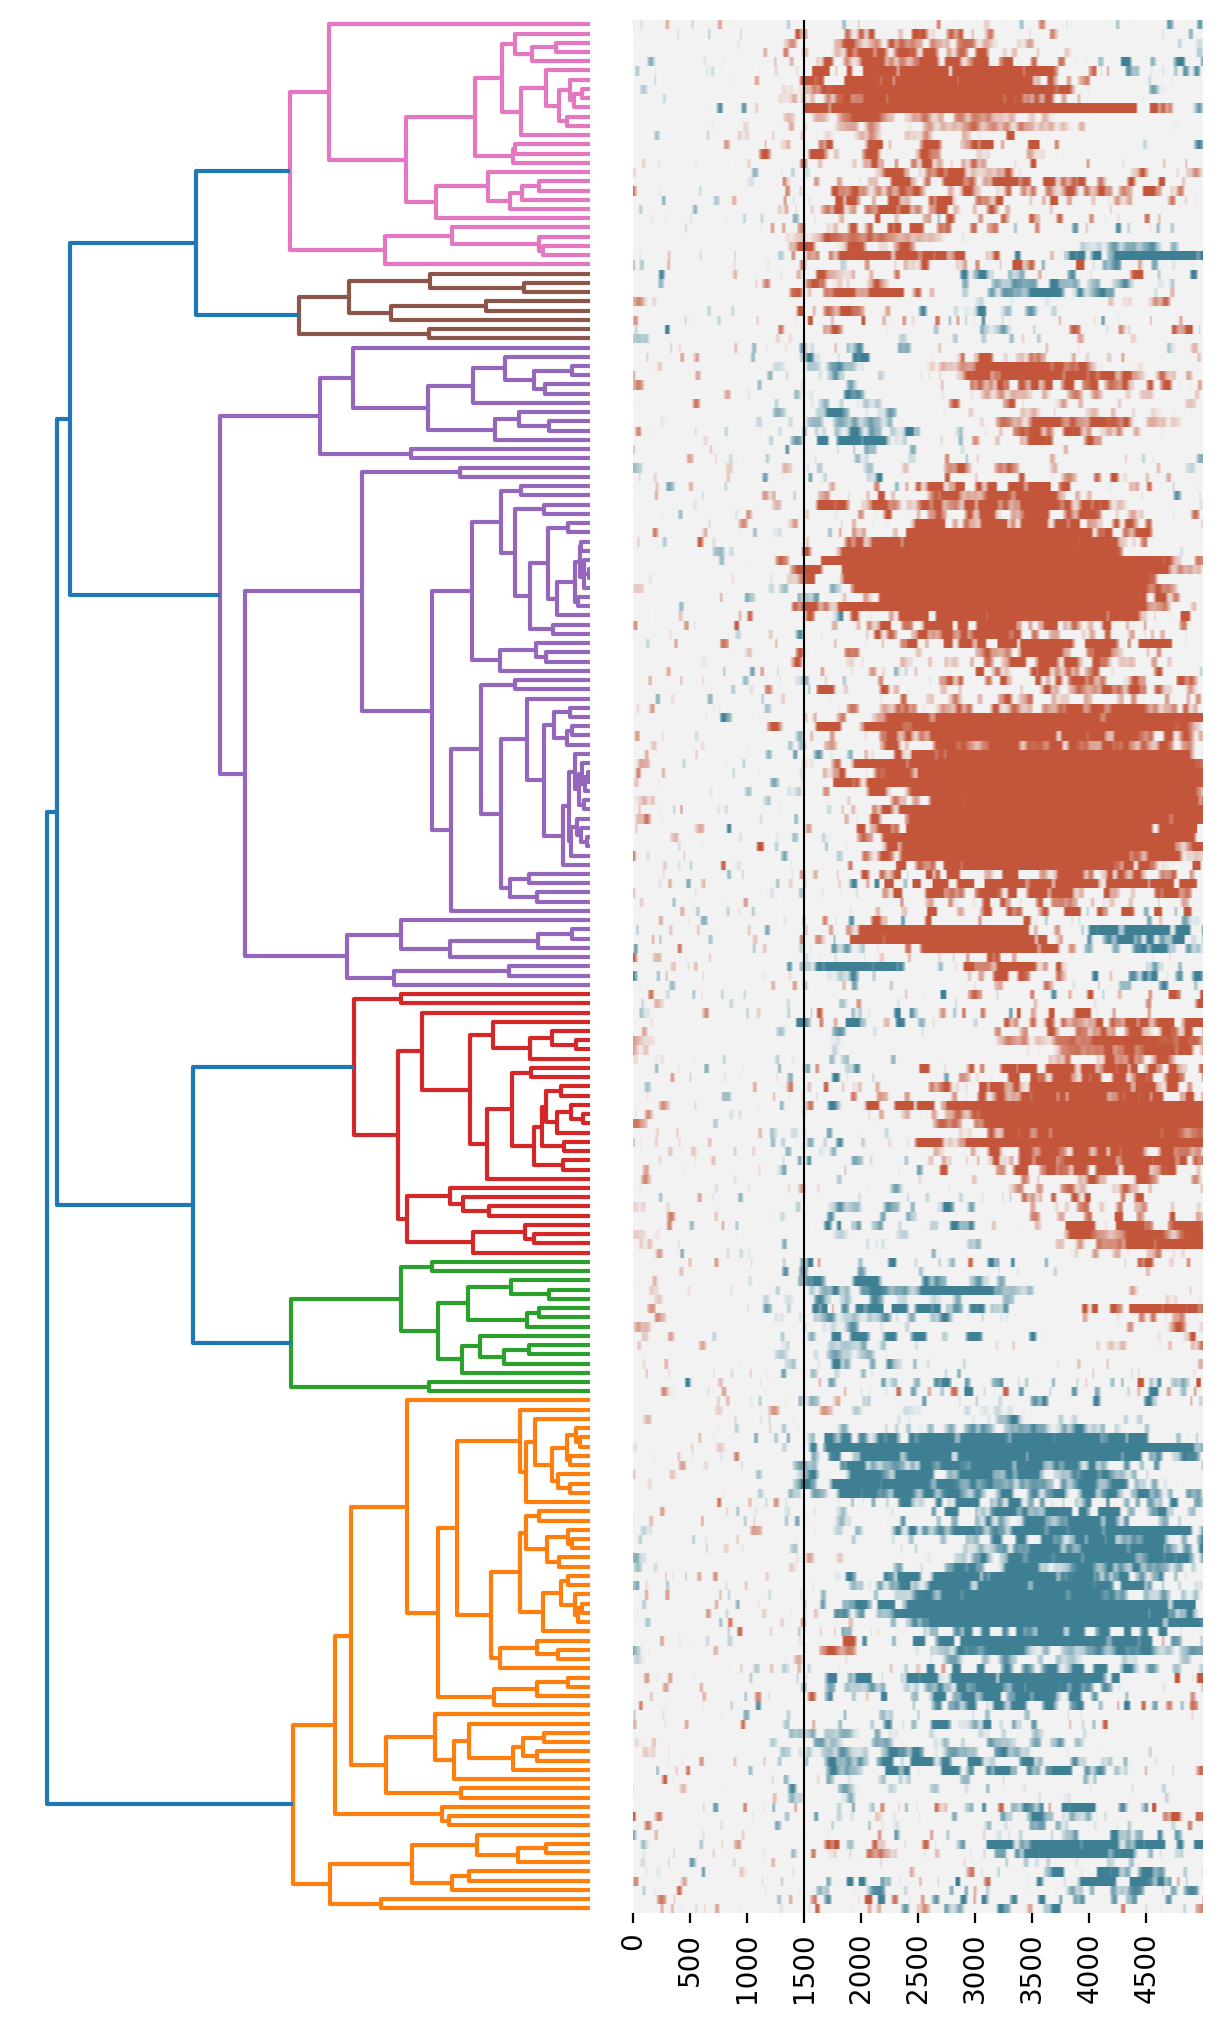

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(6, 10), dpi=200, constrained_layout=True)
use_cmap = sns.diverging_palette(220, 20, as_cmap=1, sep=125)

Z = hac.linkage(zscore_bseline(cue_mat_all)[:, 1500:], 
                metric='cosine', optimal_ordering=1, method='complete')
dn = hac.dendrogram(Z, get_leaves=1, ax=axs[0], orientation='left', no_labels=1)

cos_ordered_units = np.zeros(cue_mat_all.shape)
for item in range(cue_mat_all.shape[0]):
    cos_ordered_units[item] = cue_mat_all[dn['leaves'][item]]
    
sns.heatmap(zscore_bseline(cos_ordered_units), cmap=use_cmap, cbar=False, 
            vmax=3, vmin=-3, ax=axs[1], yticklabels=False, xticklabels=500)
axs[1].invert_yaxis()
axs[0].axis('off')
axs[1].axvline(1500, color='k', linewidth=0.75)
plt.show();

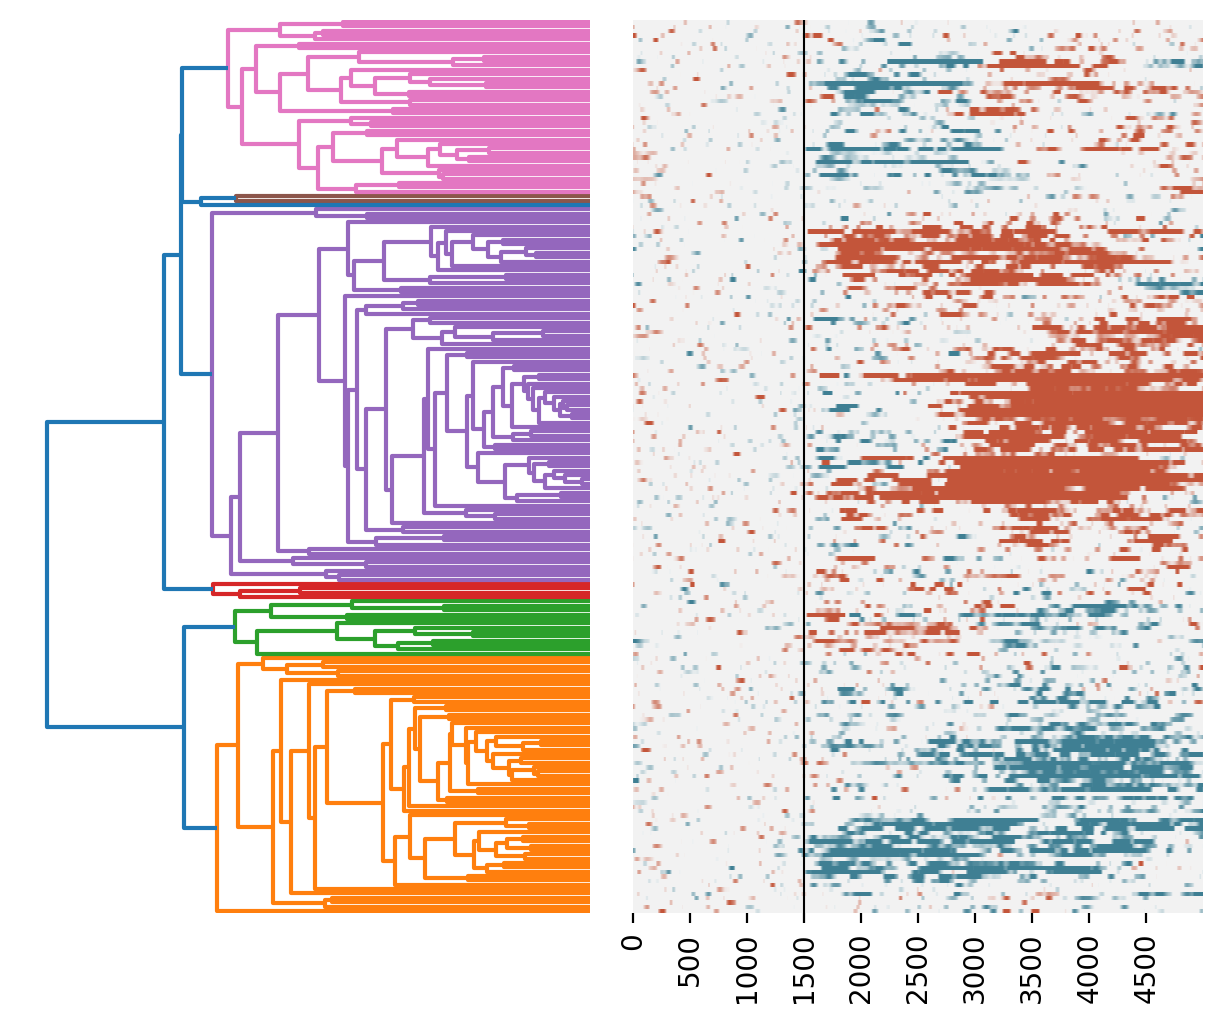

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(6, 5), dpi=200, constrained_layout=True)
use_cmap = sns.diverging_palette(220, 20, as_cmap=1, sep=125)

Z = hac.linkage(zscore_bseline(cue_mat_1)[:, 1500:], 
                metric='cosine', optimal_ordering=1, method='average')
dn = hac.dendrogram(Z, get_leaves=1, ax=axs[0], orientation='left', no_labels=1)

cos_ordered_units = np.zeros(cue_mat_1.shape)
for item in range(cue_mat_1.shape[0]):
    cos_ordered_units[item] = cue_mat_1[dn['leaves'][item]]
    
sns.heatmap(zscore_bseline(cos_ordered_units), cmap=use_cmap, cbar=False, 
            vmax=3, vmin=-3, ax=axs[1], yticklabels=False, xticklabels=500)
axs[1].invert_yaxis()
axs[0].axis('off')
axs[1].axvline(1500, color='k', linewidth=0.75)
plt.show();

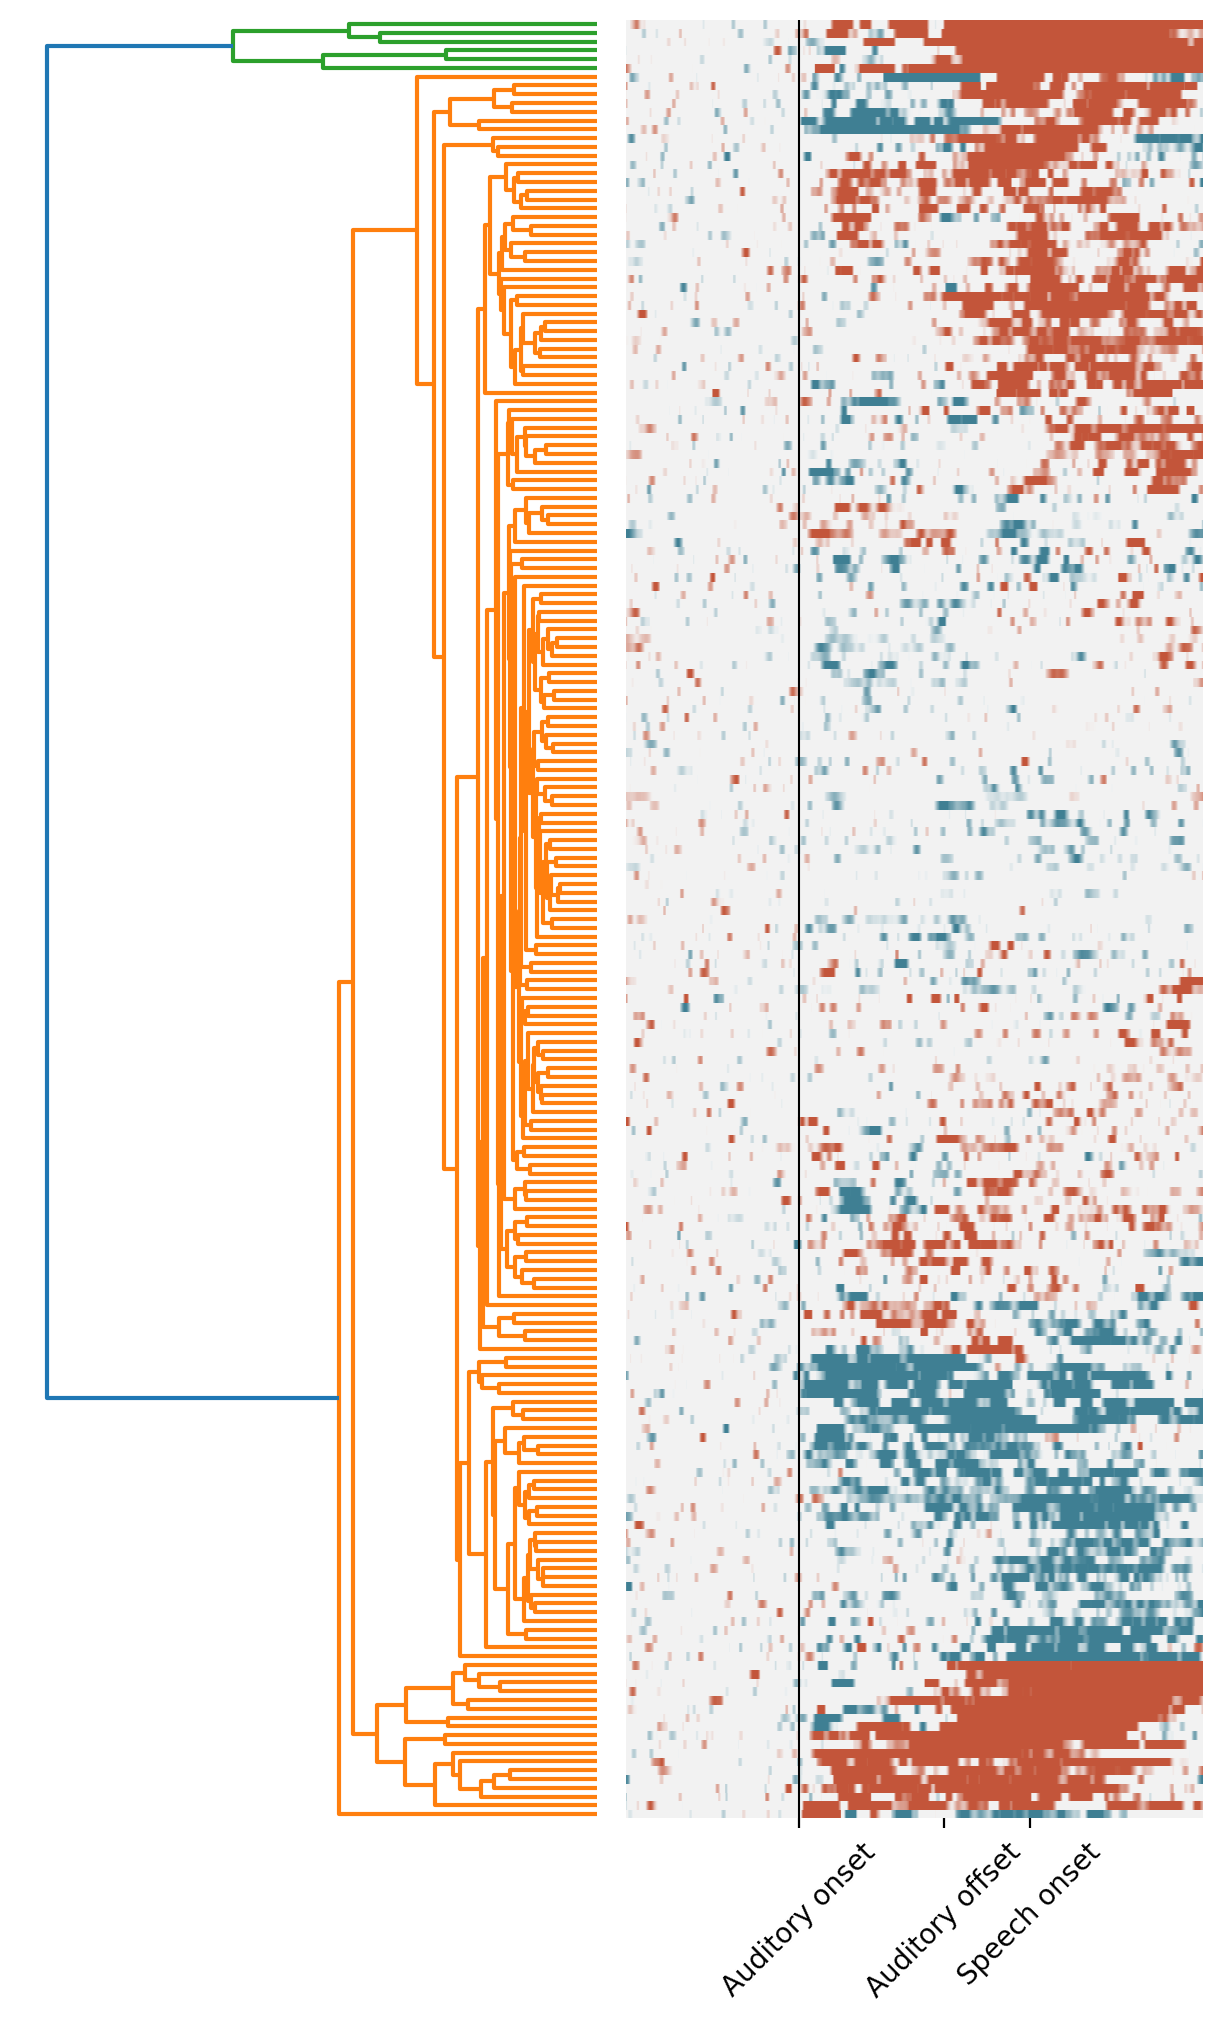

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(6, 10), dpi=200, constrained_layout=True)
use_cmap = sns.diverging_palette(220, 20, as_cmap=1, sep=125)

Z = hac.linkage(zscore_bseline(cue_mat_1)[:, 1500:], 
                metric='euclidean', optimal_ordering=1, method='average')
dn = hac.dendrogram(Z, get_leaves=1, ax=axs[0], orientation='left', no_labels=1)

cos_ordered_units = np.zeros(cue_mat_1.shape)
for item in range(cue_mat_1.shape[0]):
    cos_ordered_units[item] = cue_mat_1[dn['leaves'][item]]
    
sns.heatmap(zscore_bseline(cos_ordered_units), cmap=use_cmap, cbar=False, 
            vmax=3, vmin=-3, ax=axs[1], yticklabels=False, xticklabels=500)
axs[1].invert_yaxis()
axs[0].axis('off')
axs[1].axvline(1500, color='k', linewidth=0.75)
axs[1].set_xticks([1500, 2750, 3500])
axs[1].set_xticklabels(["Auditory onset", "Auditory offset", "Speech onset"], rotation=45)

plt.show();

In [4]:
sig_diff_cv = np.array([28, 48, 122, 176, 184, 185, 189, 199, 30, 129, 168])



In [5]:
sig_diff_cv_pos = []
for item in range(len(hac.dendrogram(Z, ax=axs[0], orientation='left', no_plot=1)['ivl'])):
    for i2 in sig_diff_cv:
        if str(i2) == hac.dendrogram(Z, ax=axs[0], orientation='left', no_plot=1)['ivl'][item]:
            sig_diff_cv_pos.append(item)

NameError: name 'Z' is not defined

In [186]:
sig_diff_cv_pos

[0, 6, 10, 73, 74, 84, 102, 166, 193, 200, 202]

In [187]:
hac.dendrogram(Z, ax=axs[0], orientation='left', no_plot=1)['ivl'][item]

'65'

In [188]:
sig_cv_loc = np.zeros((len(hac.dendrogram(Z, ax=axs[0], orientation='left', no_plot=1)['ivl']), 1))
for item in range(len(sig_cv_loc)):
    if item in sig_diff_cv_pos:
        sig_cv_loc[item] = 1
sig_cv_loc

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],

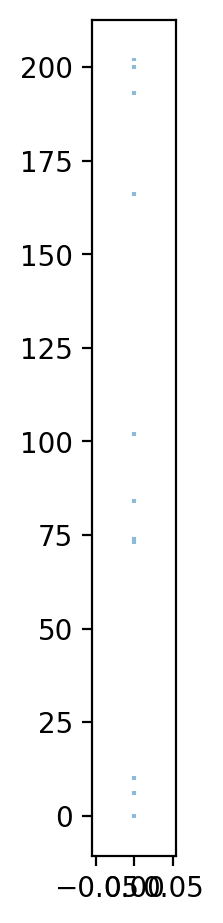

In [189]:
fig, axs = plt.subplots(1, 1, figsize=(1, 4.5), dpi=200, constrained_layout=1)

for trial in range(len(sig_cv_loc)):
    spike_times = [i for i, x in enumerate(sig_cv_loc[trial]) if x == 1]
    axs.vlines(spike_times, trial - 0.5, trial + 0.5, alpha=0.5)
    
plt.show();

In [5]:
all_unit_activity_sig = loadmat("processed_data/all_unit_activity_sig.mat")
spike_mat_sig_all = all_unit_activity_sig['spike_mat_sig_all']
pval_all = all_unit_activity_sig['pval_all']
fval_all = all_unit_activity_sig['fval_all']


In [7]:
cue_mat_1.shape
spike_mat_sig_all.shape
pval_all.shape

(205, 5000)

(205, 5000)

(205, 5000)

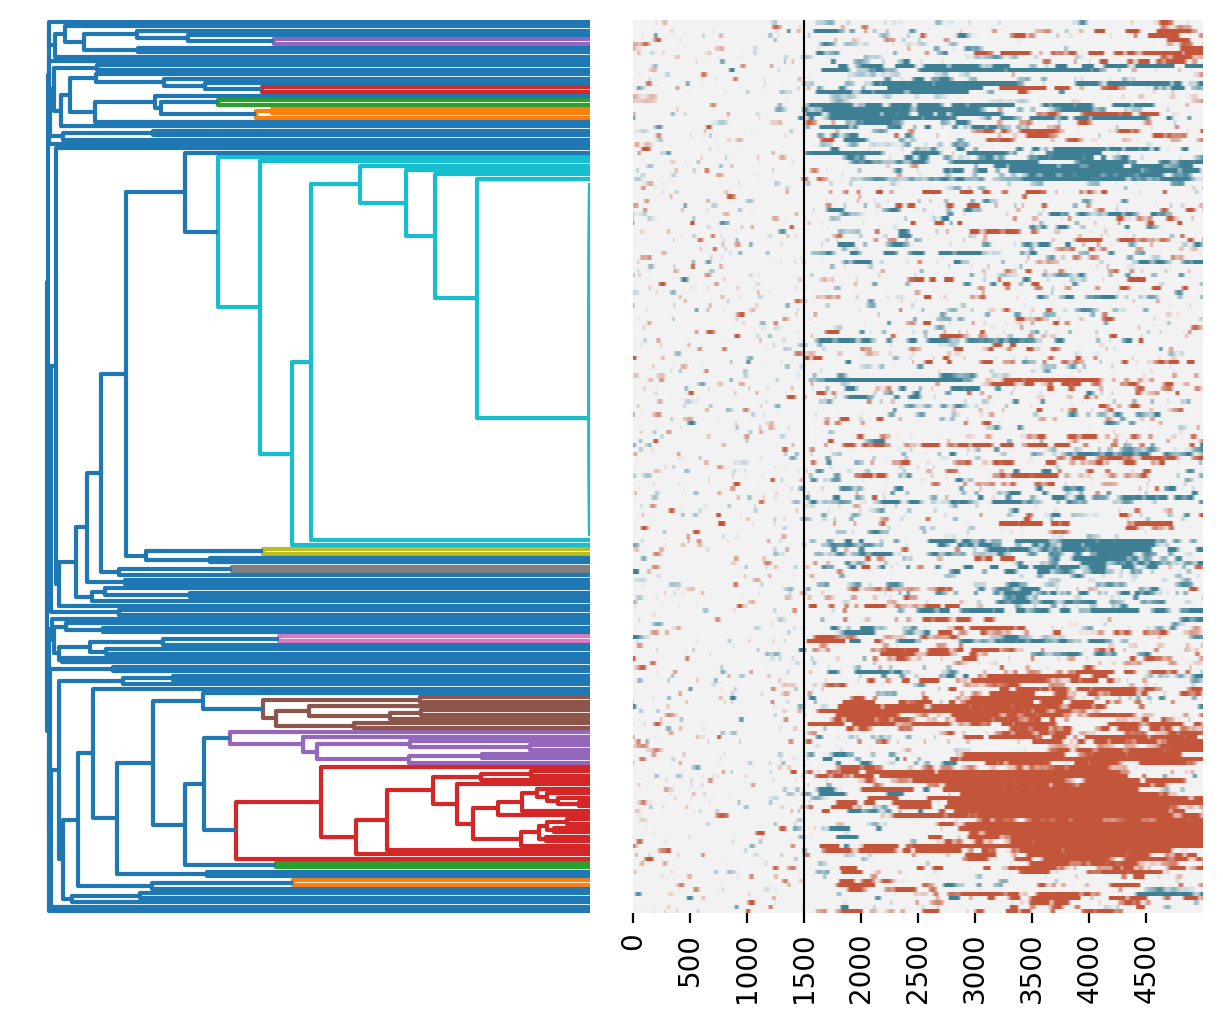

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(6, 5), dpi=200, constrained_layout=True)
use_cmap = sns.diverging_palette(220, 20, as_cmap=1, sep=125)

Z_use = zscore_bseline(cue_mat_1)*np.abs(spike_mat_sig_all)
Z_use[Z_use==0] = -0.0000001
Z = hac.linkage(Z_use[:, 1500:], 
                metric='cosine', optimal_ordering=1, method='weighted')
dn = hac.dendrogram(Z, get_leaves=1, ax=axs[0], orientation='left', no_labels=1)

cos_ordered_units = np.zeros(cue_mat_1.shape)
for item in range(cue_mat_1.shape[0]):
    cos_ordered_units[item] = cue_mat_1[dn['leaves'][item]]
    
sns.heatmap(zscore_bseline(cos_ordered_units), cmap=use_cmap, cbar=False, 
            vmax=3, vmin=-3, ax=axs[1], yticklabels=False, xticklabels=500)
axs[1].invert_yaxis()
axs[0].axis('off')
axs[1].axvline(1500, color='k', linewidth=0.75)
plt.show();

In [120]:
unique, counts = np.unique(spike_mat_sig_all[0, 1500:3000], return_counts=True)
dict(zip(unique, counts))[-1]

39

In [6]:
sig_mat = np.zeros((spike_mat_sig_all.shape[0], 4))

num_criteria = 100

for item in range(spike_mat_sig_all.shape[0]):
    unique, counts = np.unique(spike_mat_sig_all[item, 1500:3000], return_counts=True)
    if -1 in unique:
        if dict(zip(unique, counts))[-1] > num_criteria:
            sig_mat[item, 0] = 1
    if 1 in unique:
        if dict(zip(unique, counts))[1] > num_criteria:
            sig_mat[item, 1] = 1
            
    unique, counts = np.unique(spike_mat_sig_all[item, 3000:], return_counts=True)
    if -1 in unique:
        if dict(zip(unique, counts))[-1] > num_criteria:
            sig_mat[item, 2] = 1
    if 1 in unique:
        if dict(zip(unique, counts))[1] > num_criteria:
            sig_mat[item, 3] = 1
            
#sig_mat = pd.DataFrame(sig_mat)
#sig_mat.columns = ['Cue_ini', 'Cue_act', 'Speech_ini', 'Speech_act']


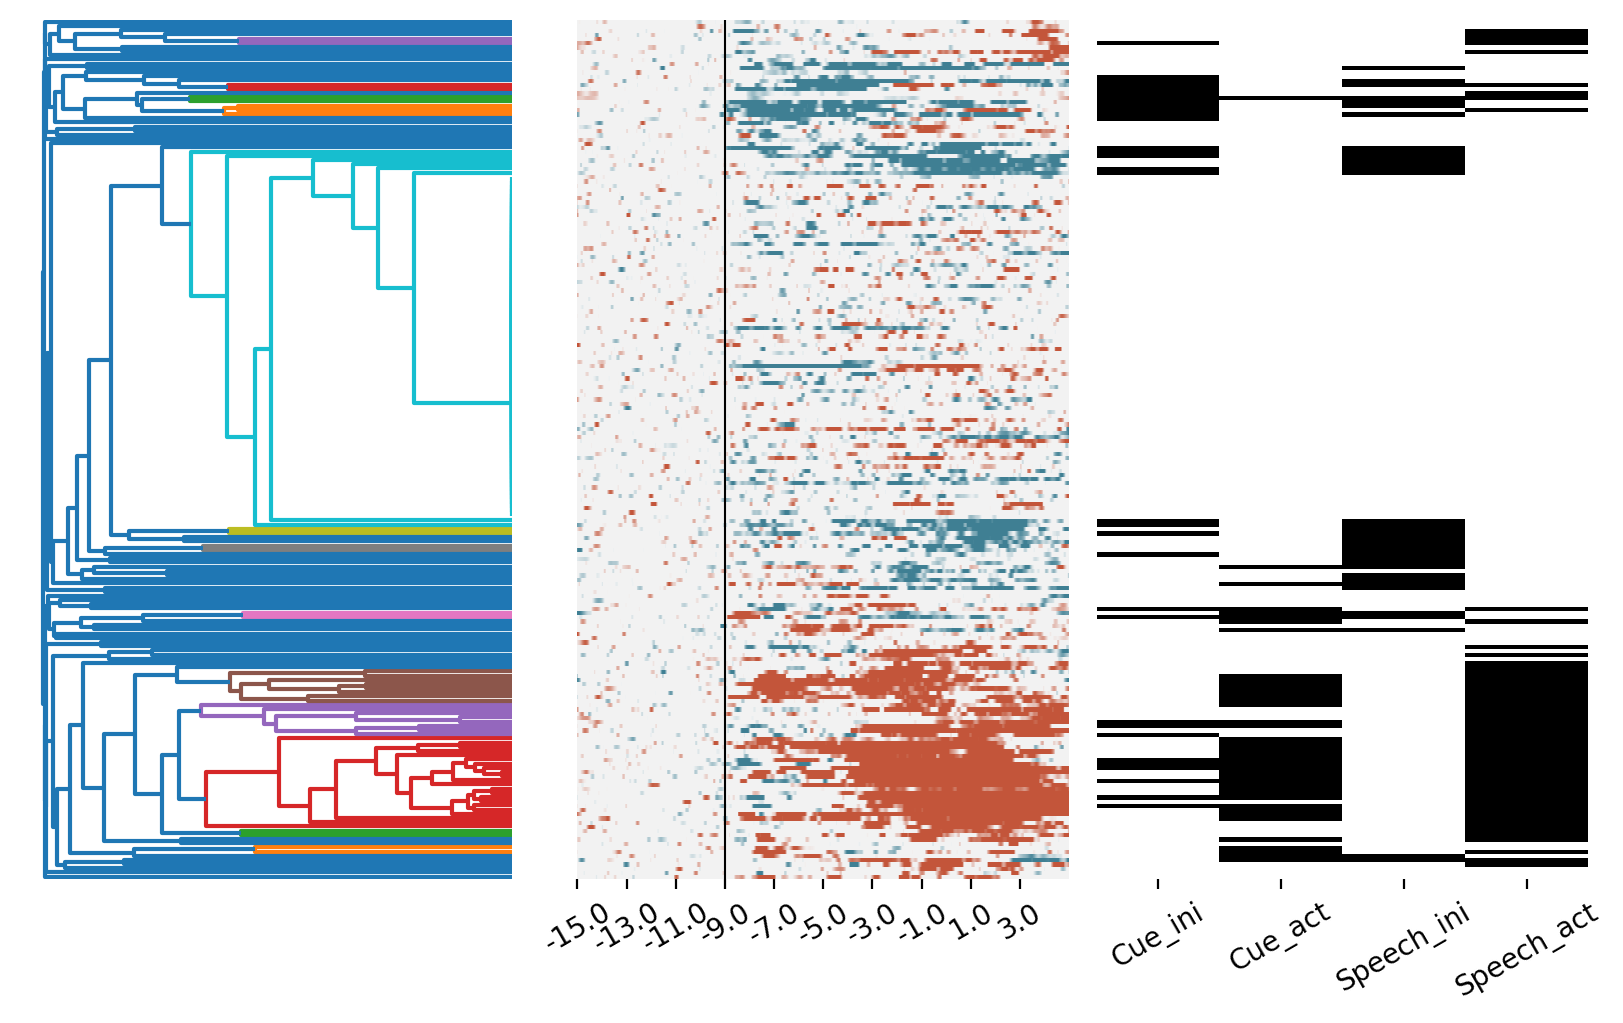

In [165]:
fig, axs = plt.subplots(1, 3, figsize=(8, 5), dpi=200, constrained_layout=True)
use_cmap = sns.diverging_palette(220, 20, as_cmap=1, sep=125)

Z_use = zscore_bseline(cue_mat_1)*np.abs(spike_mat_sig_all)
Z_use[Z_use==0] = -0.0000001
Z = hac.linkage(Z_use[:, 1500:], 
                metric='cosine', optimal_ordering=1, method='weighted')
dn = hac.dendrogram(Z, get_leaves=1, ax=axs[0], orientation='left', no_labels=1)

cos_ordered_units = np.zeros(cue_mat_1.shape)
for item in range(cue_mat_1.shape[0]):
    cos_ordered_units[item] = cue_mat_1[dn['leaves'][item]]
sns.heatmap(zscore_bseline(cos_ordered_units), cmap=use_cmap, cbar=False, 
            vmax=3, vmin=-3, ax=axs[1], yticklabels=False, xticklabels=500)

cos_ordered_sig_mat = np.zeros(sig_mat.shape)
for item in range(sig_mat.shape[0]):
    cos_ordered_sig_mat[item] = sig_mat[dn['leaves'][item]]
sns.heatmap(cos_ordered_sig_mat, cmap='Greys', ax=axs[2], cbar=False)

axs[1].invert_yaxis()
axs[2].invert_yaxis()
axs[0].axis('off')
axs[2].set_yticks([])
axs[2].set_xticklabels(['Cue_ini', 'Cue_act', 'Speech_ini', 'Speech_act'], rotation=30)
axs[1].set_xticklabels(np.linspace(-15, 3, 10), rotation=30)
axs[1].axvline(1500, color='k', linewidth=0.75)
plt.show();

In [5]:
from matplotlib import gridspec


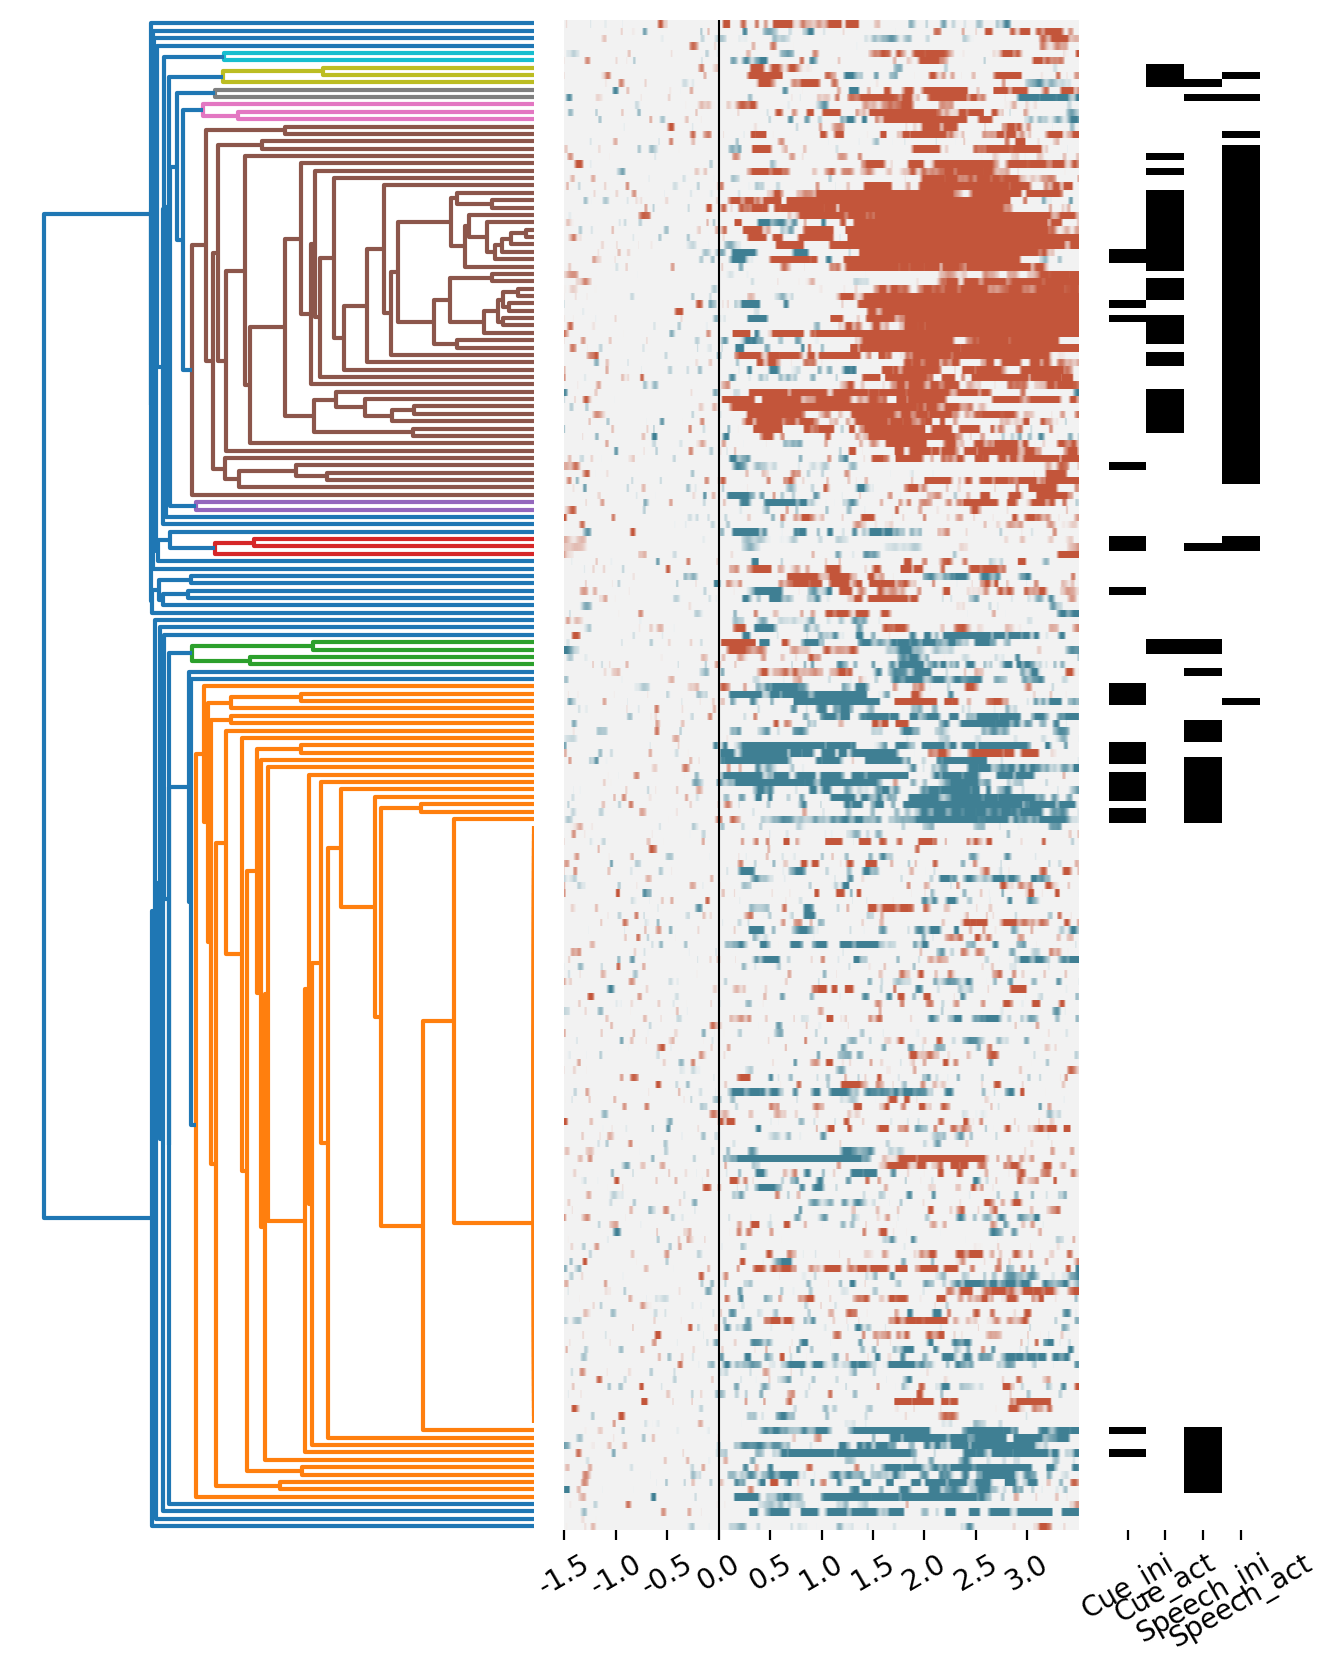

In [17]:
fig = plt.figure(figsize=(8, 10), dpi=200, constrained_layout=True)
use_cmap = sns.diverging_palette(220, 20, as_cmap=1, sep=125)

ax1 = plt.subplot2grid((1, 7), (0, 0), colspan=3, fig=fig)
ax2 = plt.subplot2grid((1, 7), (0, 3), colspan=3, fig=fig)
ax3 = plt.subplot2grid((1, 7), (0, 6), colspan=1, fig=fig)

Z_use = zscore_bseline(cue_mat_1)*np.abs(spike_mat_sig_all)
Z_use[Z_use==0] = -0.0000001
Z = hac.linkage(Z_use[:, 1500:], 
                metric='cosine', optimal_ordering=1, method='average')
dn = hac.dendrogram(Z, get_leaves=1, ax=ax1, orientation='left', no_labels=1)

cos_ordered_units = np.zeros(cue_mat_1.shape)
for item in range(cue_mat_1.shape[0]):
    cos_ordered_units[item] = cue_mat_1[dn['leaves'][item]]
sns.heatmap(zscore_bseline(cos_ordered_units), cmap=use_cmap, cbar=False, 
            vmax=3, vmin=-3, ax=ax2, yticklabels=False, xticklabels=500)

cos_ordered_sig_mat = np.zeros(sig_mat.shape)
for item in range(sig_mat.shape[0]):
    cos_ordered_sig_mat[item] = sig_mat[dn['leaves'][item]]
sns.heatmap(cos_ordered_sig_mat, cmap='Greys', ax=ax3, cbar=False)

ax2.invert_yaxis()
ax3.invert_yaxis()
ax1.axis('off')
ax3.set_yticks([])
ax3.set_xticklabels(['Cue_ini', 'Cue_act', 'Speech_ini', 'Speech_act'], rotation=30)
ax2.set_xticklabels(np.linspace(-1.5, 3, 10), rotation=30)
ax2.axvline(1500, color='k', linewidth=0.75)
plt.show();

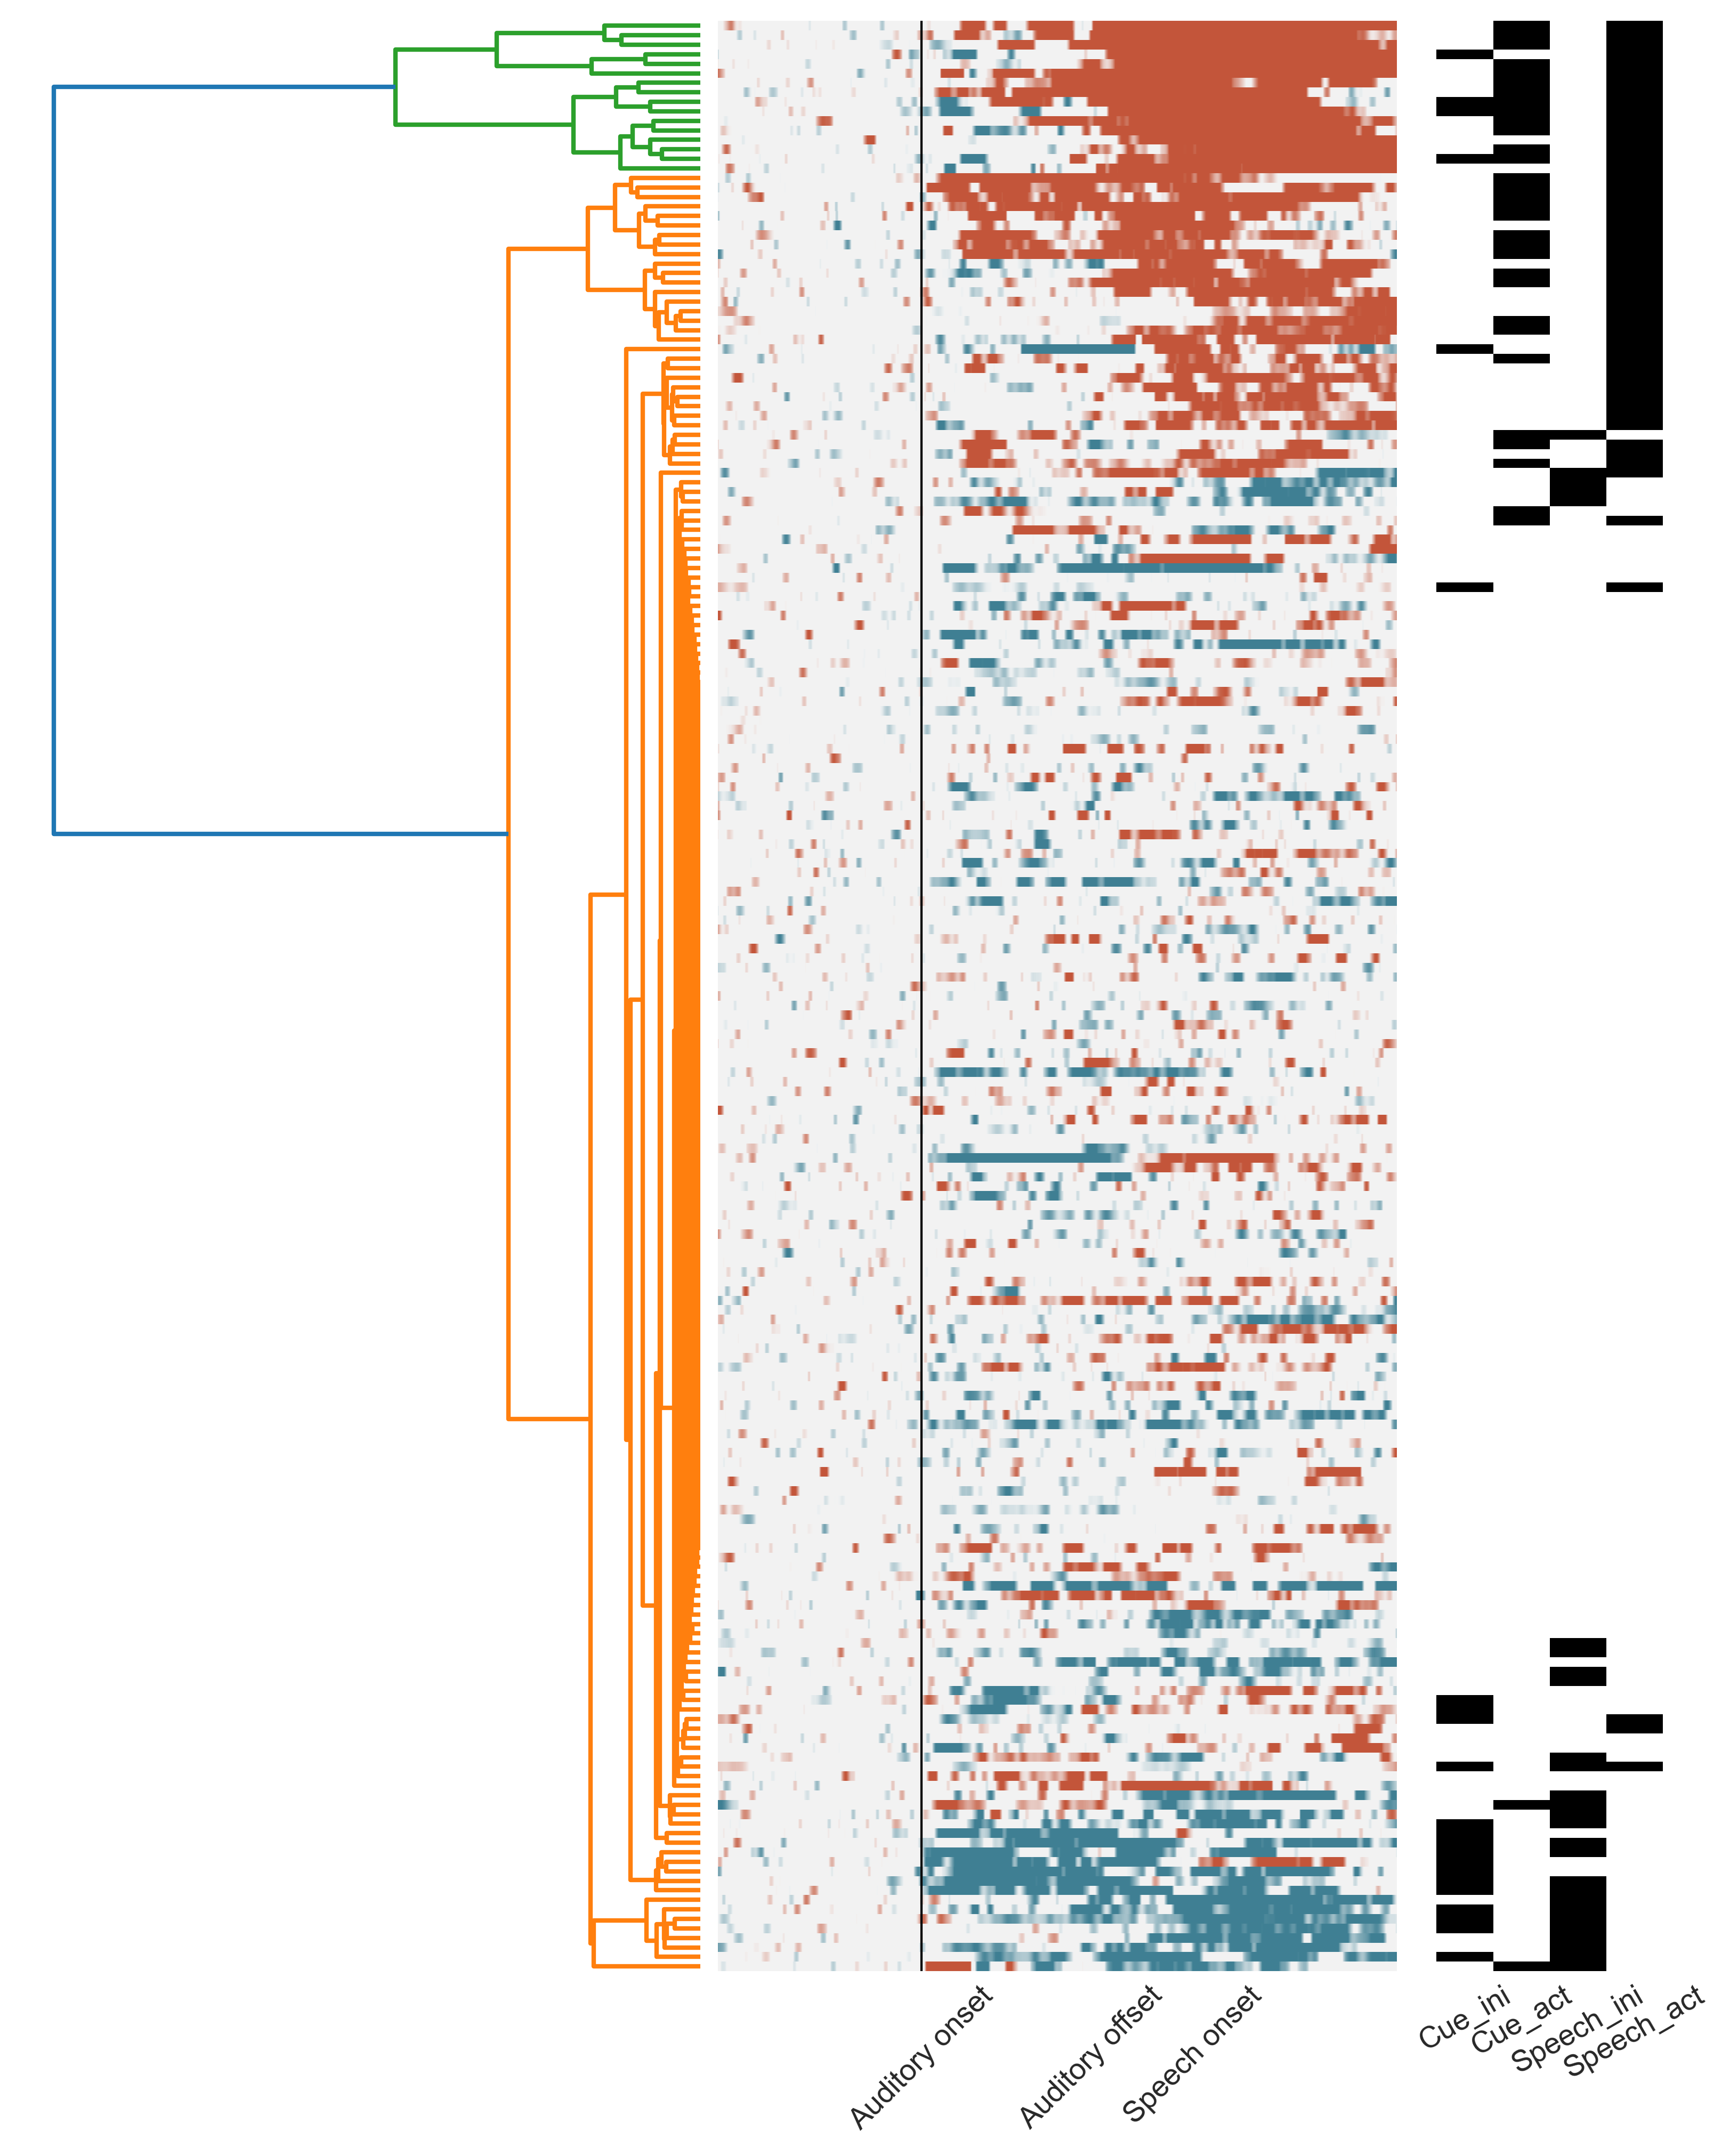

In [13]:
fig = plt.figure(figsize=(8, 10), dpi=200, constrained_layout=True)
use_cmap = sns.diverging_palette(220, 20, as_cmap=1, sep=125)

ax1 = plt.subplot2grid((1, 7), (0, 0), colspan=3, fig=fig)
ax2 = plt.subplot2grid((1, 7), (0, 3), colspan=3, fig=fig)
ax3 = plt.subplot2grid((1, 7), (0, 6), colspan=1, fig=fig)

Z_use = zscore_bseline(cue_mat_1)*np.abs(spike_mat_sig_all)
Z_use[Z_use==0] = -0.0000001
Z = hac.linkage(Z_use[:, 1500:], 
                metric='euclidean', optimal_ordering=1, method='ward')
dn = hac.dendrogram(Z, get_leaves=1, ax=ax1, orientation='left', no_labels=1)

cos_ordered_units = np.zeros(cue_mat_1.shape)
for item in range(cue_mat_1.shape[0]):
    cos_ordered_units[item] = cue_mat_1[dn['leaves'][item]]
sns.heatmap(zscore_bseline(cos_ordered_units), cmap=use_cmap, cbar=False, 
            vmax=3, vmin=-3, ax=ax2, yticklabels=False, xticklabels=500)

cos_ordered_sig_mat = np.zeros(sig_mat.shape)
for item in range(sig_mat.shape[0]):
    cos_ordered_sig_mat[item] = sig_mat[dn['leaves'][item]]
sns.heatmap(cos_ordered_sig_mat, cmap='Greys', ax=ax3, cbar=False)

ax2.invert_yaxis()
ax3.invert_yaxis()
ax1.axis('off')
ax2.set_xticks([1500, 2750, 3500])
ax2.set_xticklabels(["Auditory onset", "Auditory offset", "Speech onset"], rotation=45)
ax3.set_yticks([])
ax3.set_xticklabels(['Cue_ini', 'Cue_act', 'Speech_ini', 'Speech_act'], rotation=30)
ax2.axvline(1500, color='k', linewidth=0.75)
plt.show();

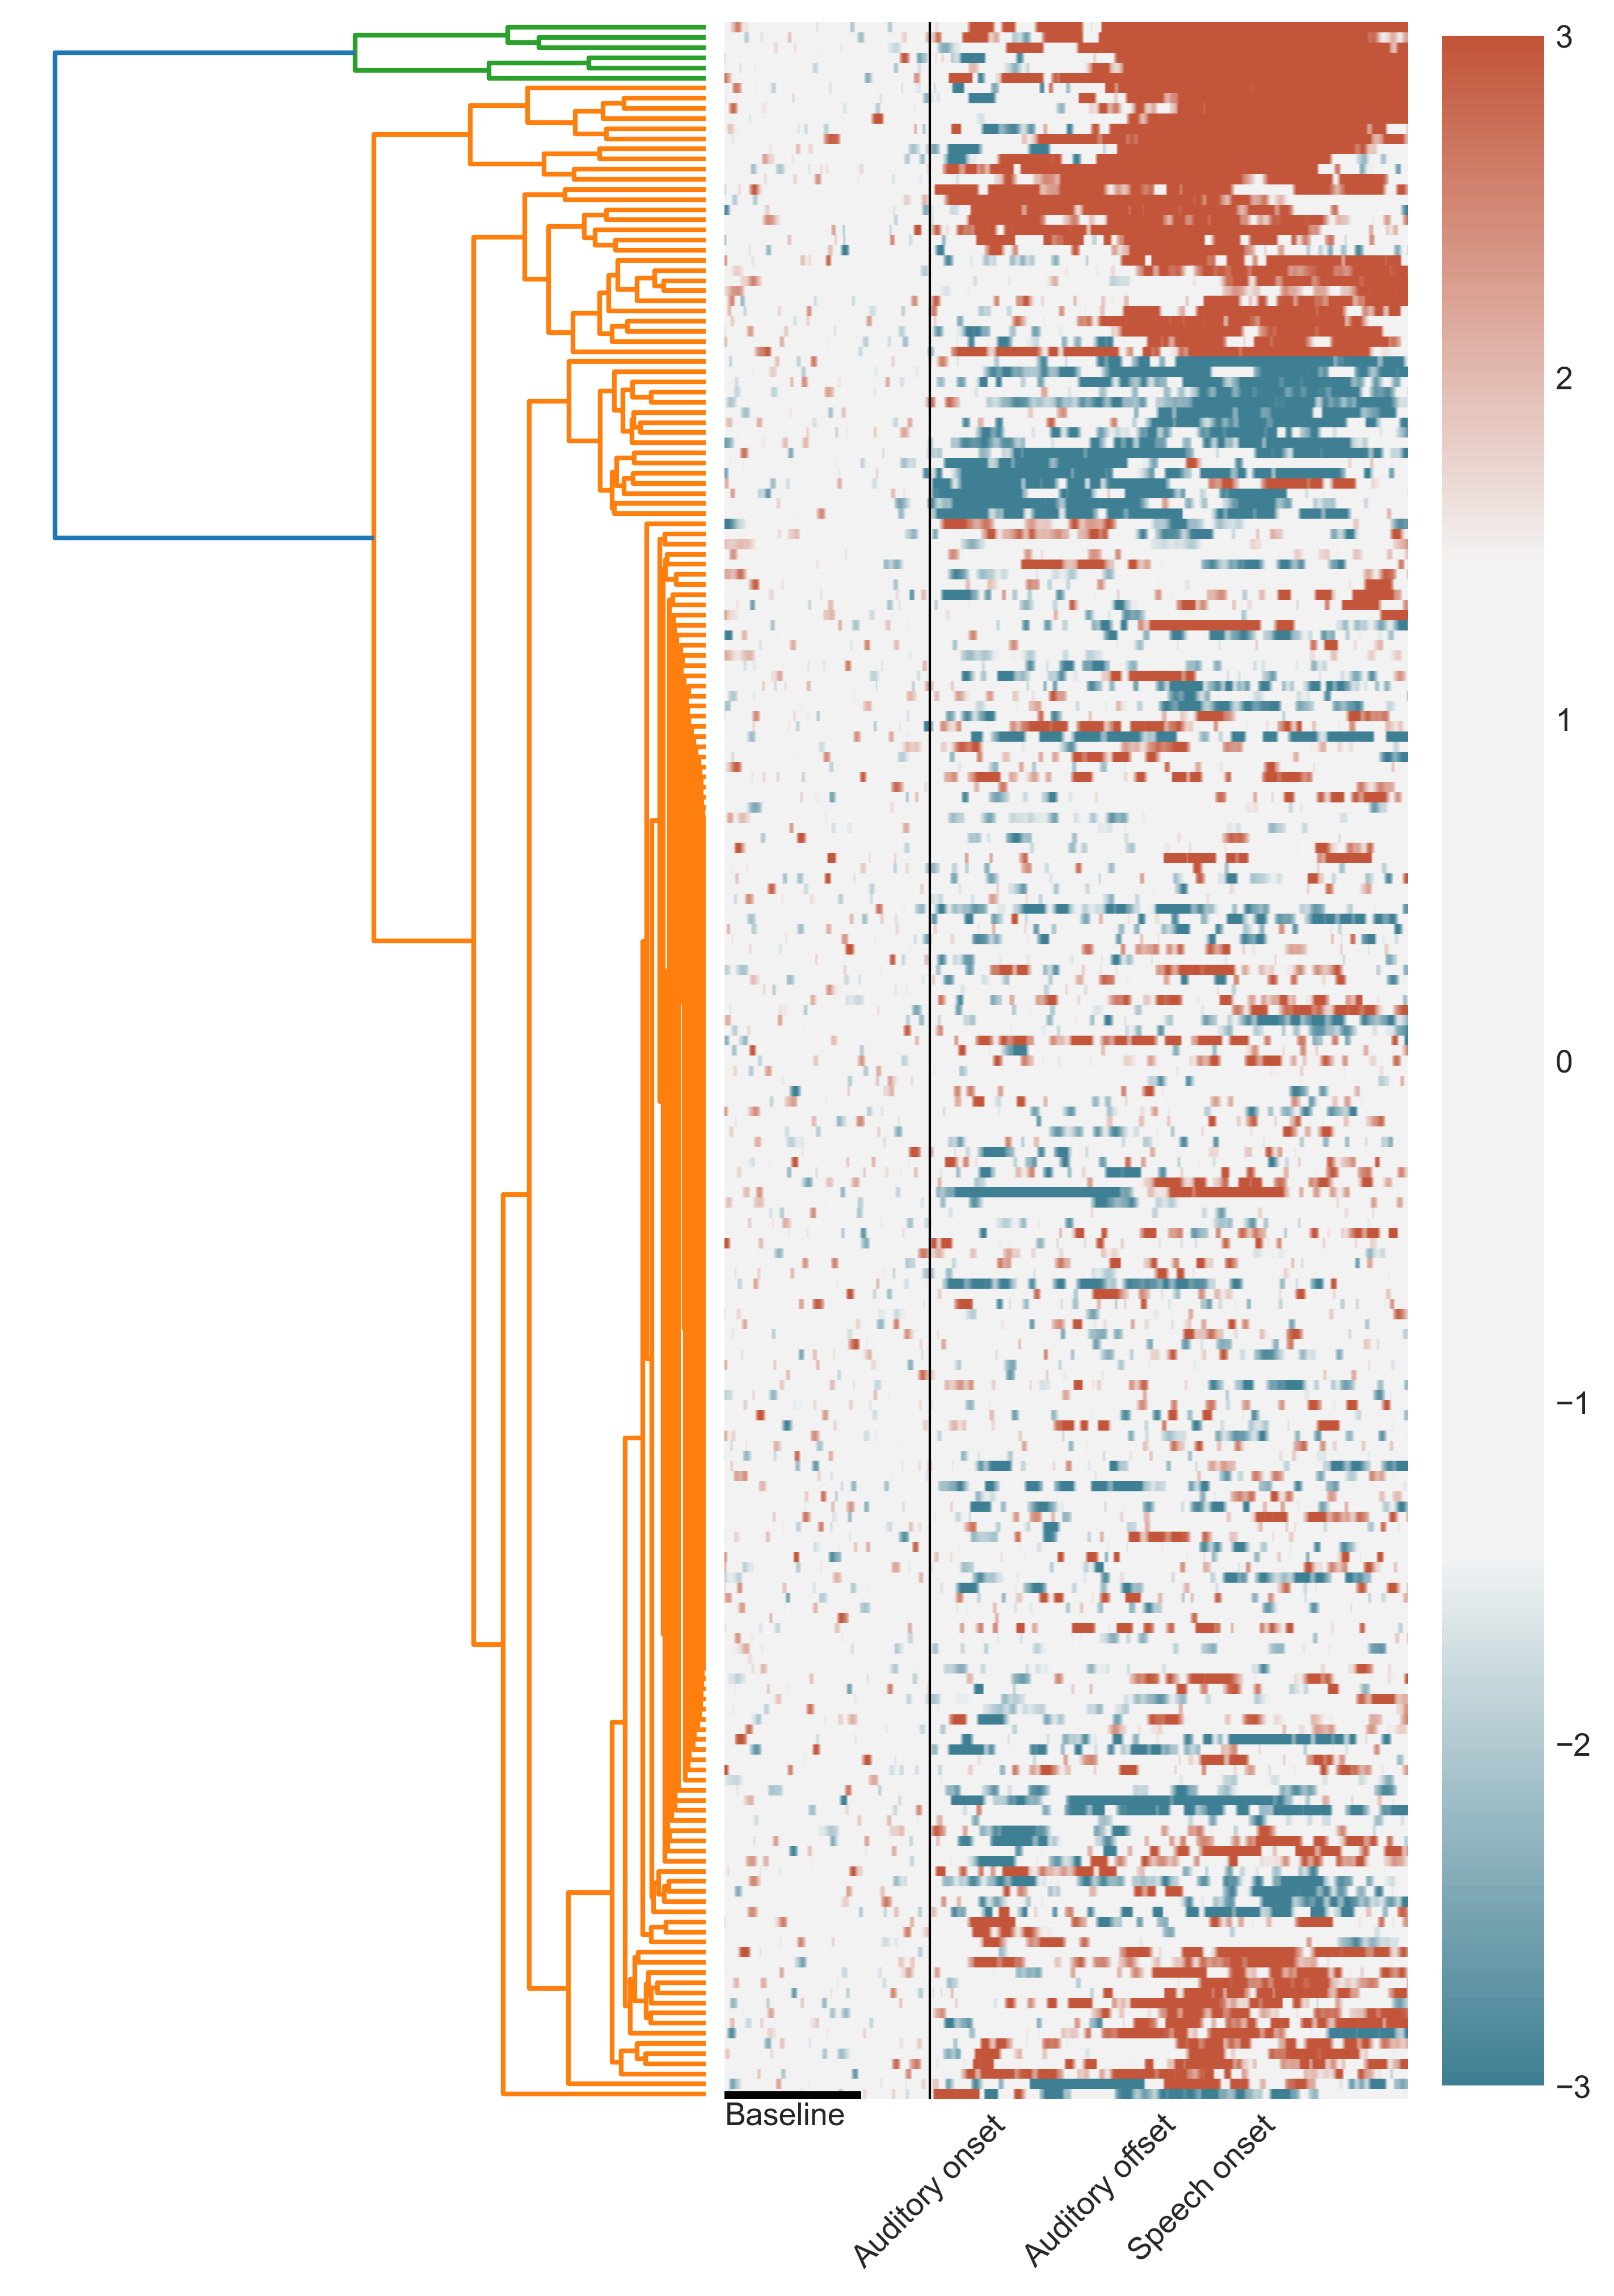

In [43]:
fig = plt.figure(figsize=(8, 10), dpi=200, constrained_layout=True)
use_cmap = sns.diverging_palette(220, 20, as_cmap=1, sep=125)

ax1 = plt.subplot2grid((1, 7), (0, 0), colspan=3, fig=fig)
ax2 = plt.subplot2grid((1, 7), (0, 3), colspan=3, fig=fig)

ax1.patch.set_alpha(0)
ax2.patch.set_alpha(0)
fig.patch.set_alpha(0)

Z_use = zscore_bseline(cue_mat_1)*np.abs(spike_mat_sig_all)
Z_use[Z_use==0] = -0.0000001
Z = hac.linkage(Z_use[:, 1500:], 
                metric='euclidean', optimal_ordering=1, method='complete')
dn = hac.dendrogram(Z, get_leaves=1, ax=ax1, orientation='left', no_labels=1)

cos_ordered_units = np.zeros(cue_mat_1.shape)
for item in range(cue_mat_1.shape[0]):
    cos_ordered_units[item] = cue_mat_1[dn['leaves'][item]]
sns.heatmap(zscore_bseline(cos_ordered_units), cmap=use_cmap, 
            vmax=3, vmin=-3, ax=ax2, yticklabels=False, xticklabels=500)

ax2.invert_yaxis()
ax1.axis('off')
ax2.set_xticks([1500, 2750, 3500])
ax2.set_xticklabels(["Auditory onset", "Auditory offset", "Speech onset"], rotation=45)
ax2.axvline(1500, color='k', linewidth=0.75)

ax2.hlines(y=0, xmin=0, xmax=1000, linewidth=5, color='k')
ax2.text(0, -2.5, 'Baseline', fontsize = 10)

plt.show();

In [12]:
ax1.get_xlim()

(2494.081515187828, 0.0)

In [10]:
import matplotlib.patches as patches


(205, 5000)

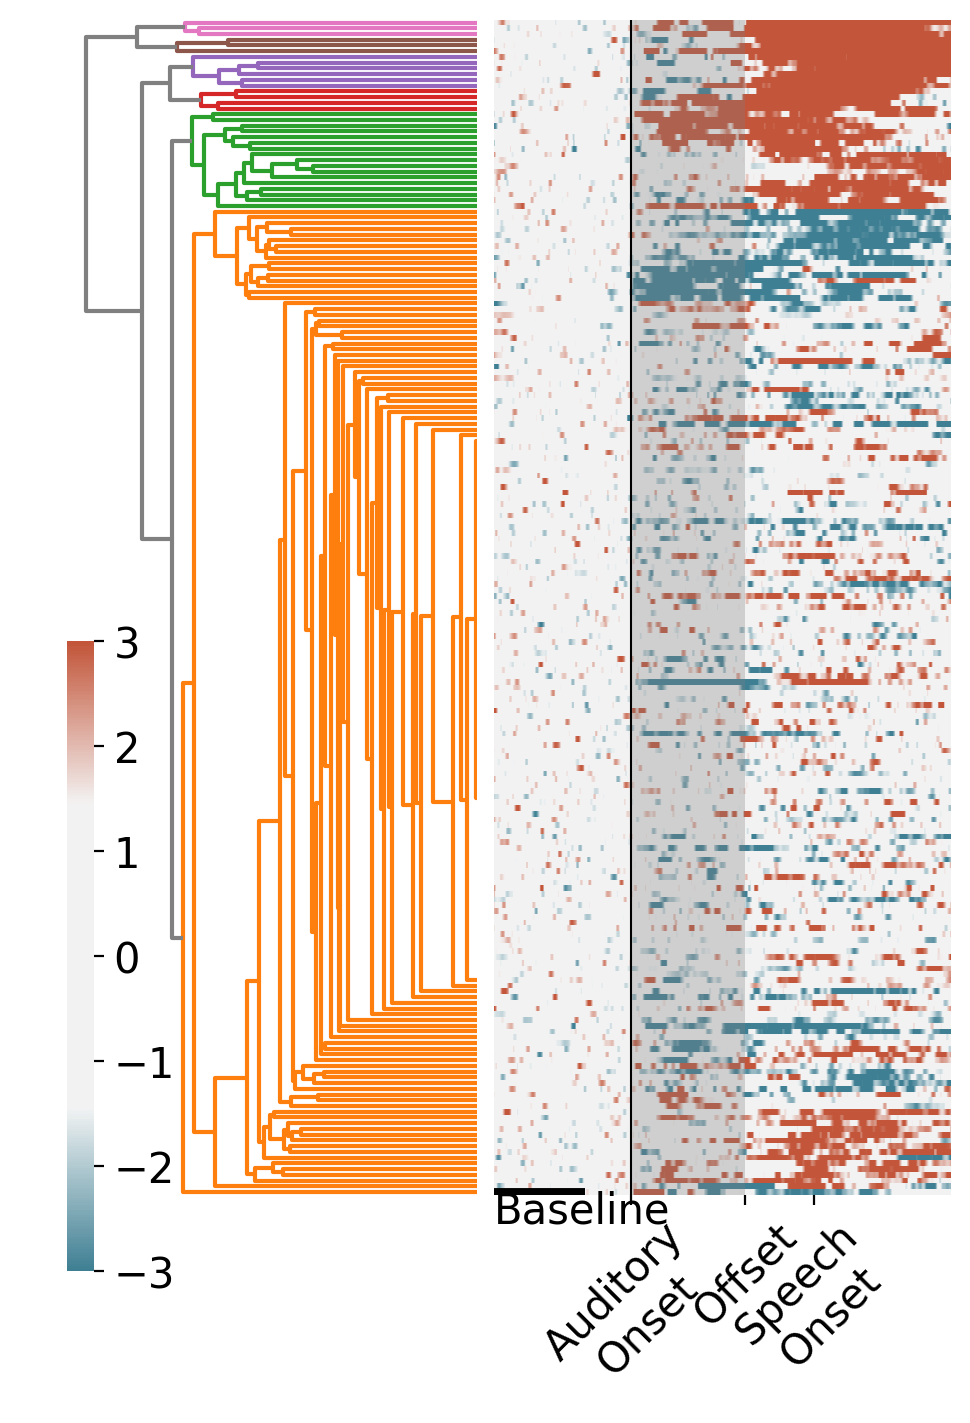

In [14]:
fig = plt.figure(figsize=(5.5, 7), dpi=200, constrained_layout=True)
use_cmap = sns.diverging_palette(220, 20, as_cmap=1, sep=125)

ax1 = plt.subplot2grid((1, 7), (0, 0), colspan=3, fig=fig)
ax2 = plt.subplot2grid((1, 7), (0, 3), colspan=3, fig=fig)

ax1.patch.set_alpha(0)
ax2.patch.set_alpha(0)
fig.patch.set_alpha(0)

Z_use = zscore_bseline(cue_mat_1)*np.abs(spike_mat_sig_all)
Z_use[Z_use==0] = -0.0000001
Z = hac.linkage(Z_use[:, 1500:], 
                metric='euclidean', optimal_ordering=1, method='complete')
dn = hac.dendrogram(Z, get_leaves=1, ax=ax1, orientation='left', no_labels=1, 
                    color_threshold=400, above_threshold_color="grey")
ax1.set_xlim(2500, 10)
ax1.set_xscale('log')

cos_ordered_units = np.zeros(cue_mat_1.shape)
for item in range(cue_mat_1.shape[0]):
    cos_ordered_units[item] = cue_mat_1[dn['leaves'][item]]
im = sns.heatmap(zscore_bseline(cos_ordered_units), cmap=use_cmap, cbar=False, 
            vmax=3, vmin=-3, ax=ax2, yticklabels=False, xticklabels=500)

ax2.invert_yaxis()
ax1.axis('off')
ax2.set_xticks([1500, 2750, 3500])
ax2.set_xticklabels(["Auditory\nOnset", "Offset", "Speech\nOnset"], rotation=45, fontsize=15)
ax2.axvline(1500, color='k', linewidth=0.75)

ax2.hlines(y=0, xmin=0, xmax=1000, linewidth=5, color='k')
ax2.text(0, -5, 'Baseline', fontsize = 15)
rect = patches.Rectangle((1500, 0), 1250, Z_use.shape[0], edgecolor='none', facecolor='grey', alpha=0.3)
ax2.add_patch(rect)


cbaxes = fig.add_axes([0.05, 0.1, 0.025, 0.45])  
cb=fig.colorbar(ax2.get_children()[0], cax=cbaxes)
cb.outline.set_linewidth(0)
cb.ax.tick_params(labelsize=15)
plt.show();
#plt.savefig("../plots/fig1c.png", format = 'png', dpi=200);

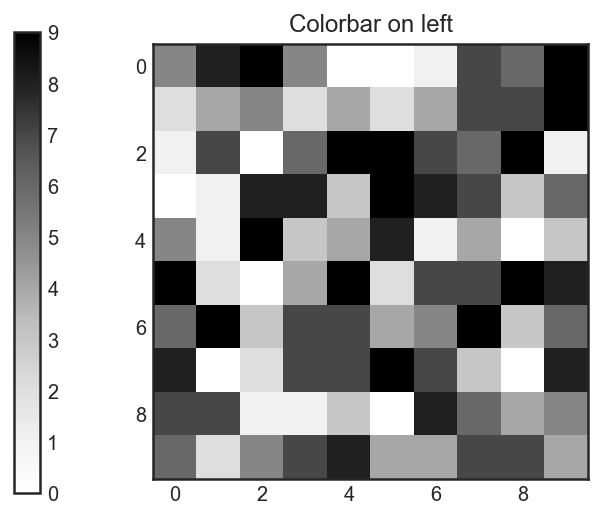

In [22]:
# make this example reproducible
np.random.seed(1)
 
# create chart
fig = plt.figure()
ax = fig.add_subplot(111)
axp = ax.imshow(np.random.randint(0, 10, (10, 10)))
ax.set_title('Colorbar on left')
 
# Adding the colorbar
cbaxes = fig.add_axes([0.1, 0.1, 0.03, 0.8])  
 
# position for the colorbar
cb = plt.colorbar(axp, cax = cbaxes)
plt.show();

In [8]:
use_cmap = sns.choose_colorbrewer_palette('diverging')

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

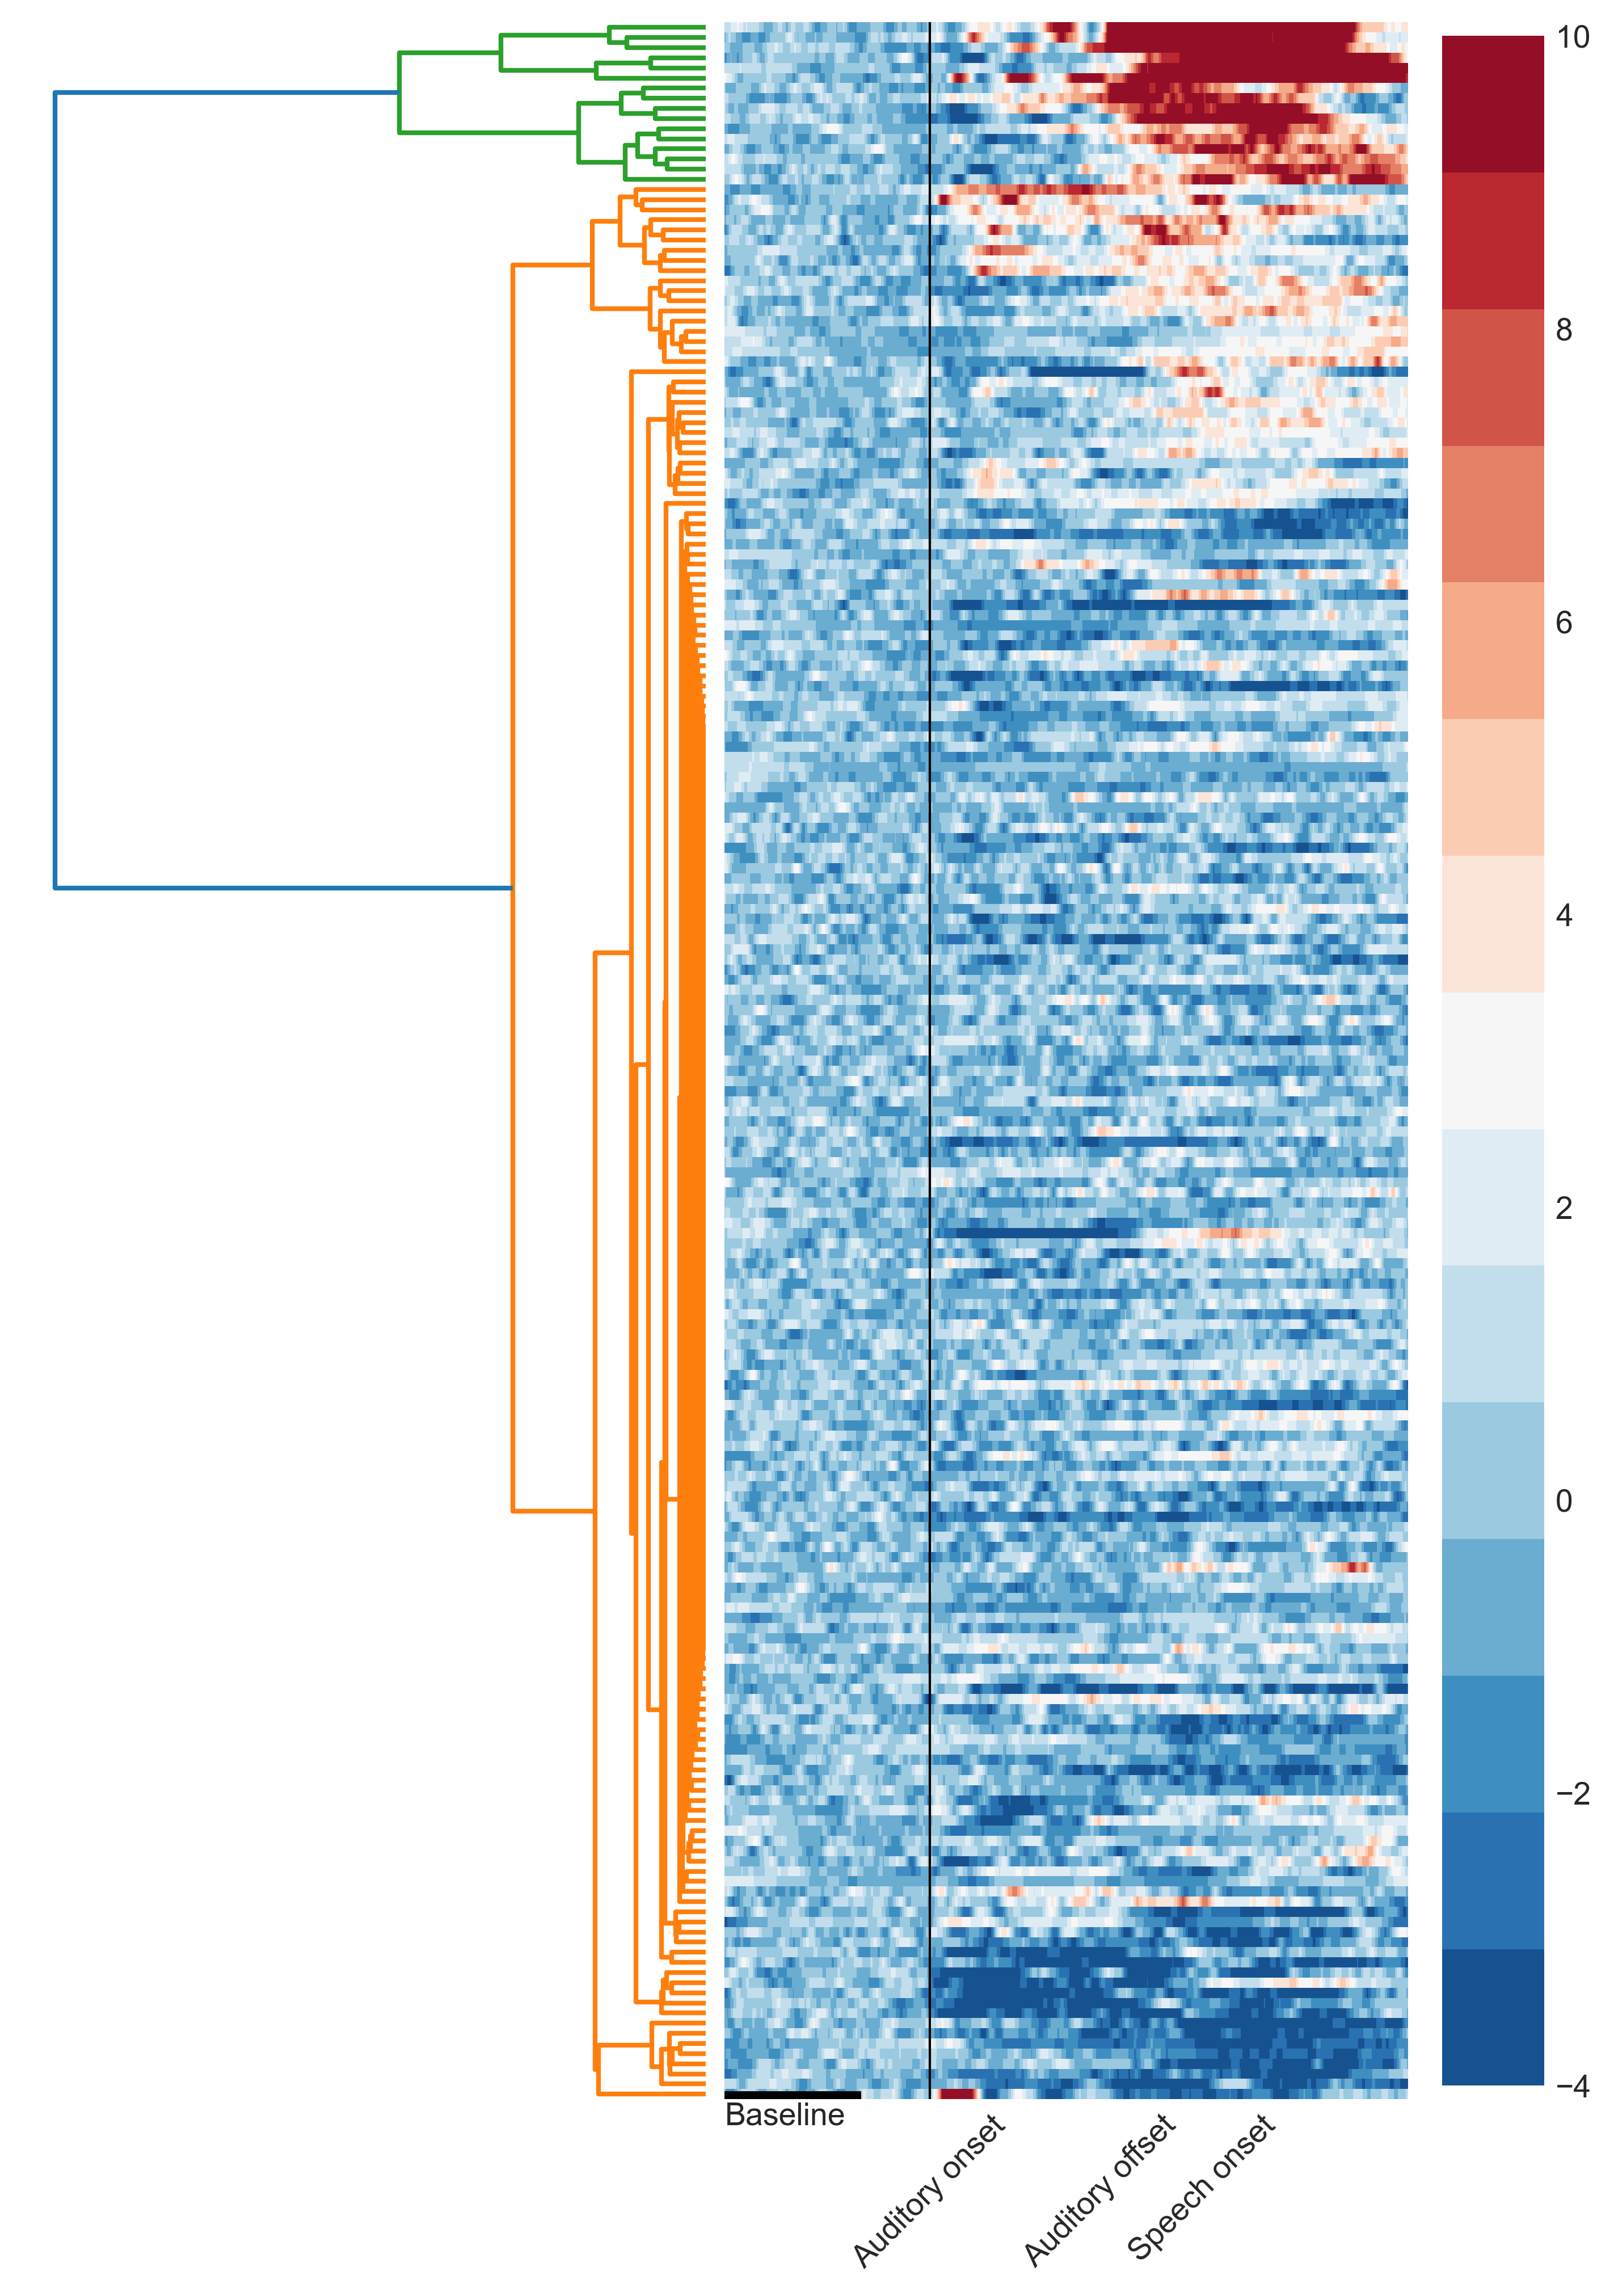

In [18]:
fig = plt.figure(figsize=(8, 10), dpi=200, constrained_layout=True)

ax1 = plt.subplot2grid((1, 7), (0, 0), colspan=3, fig=fig)
ax2 = plt.subplot2grid((1, 7), (0, 3), colspan=3, fig=fig)

ax1.patch.set_alpha(0)
ax2.patch.set_alpha(0)
fig.patch.set_alpha(0)

Z_use = zscore_bseline(cue_mat_1)*np.abs(spike_mat_sig_all)
Z_use[Z_use==0] = -0.0000001
Z = hac.linkage(Z_use[:, 1500:], 
                metric='euclidean', optimal_ordering=1, method='ward')
dn = hac.dendrogram(Z, get_leaves=1, ax=ax1, orientation='left', no_labels=1)

cos_ordered_units = np.zeros(cue_mat_1.shape)
for item in range(cue_mat_1.shape[0]):
    cos_ordered_units[item] = cue_mat_1[dn['leaves'][item]]
sns.heatmap(zscore_bseline(cos_ordered_units), cmap=use_cmap, 
            vmax=10, vmin=-4, ax=ax2, yticklabels=False, xticklabels=500)

ax2.invert_yaxis()
ax1.axis('off')
ax2.set_xticks([1500, 2750, 3500])
ax2.set_xticklabels(["Auditory onset", "Auditory offset", "Speech onset"], rotation=45)
ax2.axvline(1500, color='k', linewidth=0.75)

ax2.hlines(y=0, xmin=0, xmax=1000, linewidth=5, color='k')
ax2.text(0, -2.5, 'Baseline', fontsize = 10)

plt.show();